# Graia MNIST digits example

In [1]:
# %pip install numpy
# %pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

# to get the MNIST digits
# %pip install tensorflow
import tensorflow as tf
import tensorflow.keras

2024-04-23 16:12:01.500384: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-23 16:12:01.500583: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-23 16:12:01.502709: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-23 16:12:01.528671: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-23 16:12:02.060720: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
# Graia
# %pip install pyopencl
# %pip install pocl-binary-distribution
# %pip install futhark-ffi
from graia import Graia

🌄 Graia v0.0.1


In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# print(train_labels[0])
# plt.imshow(train_images[0])

In [4]:
N = 6000
train_images = train_images[:N]
train_labels = train_labels[:N]
train_images = train_images.reshape(N, 28*28)

In [5]:
model = Graia(inputs=28*28, layer_nodes=16, layers=2, outputs=10, boost=127, seed=37)
# plt.imshow(model.hidden_weights[0])
# print(model.hidden_weights[0])

🌄 Graia model with 12,960 parameters ready.


In [6]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5: accuracy 10.367%
Epoch 2/5: accuracy 9.617%
Epoch 3/5: accuracy 9.467%
Epoch 4/5: accuracy 10.583%
Epoch 5/5: accuracy 10.483%


In [7]:
print("\n", model.input_weights[:2], "...")
print("\n", model.hidden_weights[0])
print("\n", model.output_weights[:2], "...")



 [[-8  5  5 ... -7  5  8]
 [-4 -6  7 ... -4 -4  5]] ...

 [[ 5  7  5  5  5  5 -5  8  5  5  6  8 -5 -7 -6  5]
 [ 5  7  5  5 -3 -6 -4 -6  8 -6 -6 -5  5 -7  7 -5]
 [ 5 -5 -6 -8  5 -6 -4  5  7 -4 -5  5 -5 -8  5  5]
 [-4  8  6  5 -5 -3  5  8 -6  5 -7 -7  5  8 -8  6]
 [ 6 -3 -4  6  6 -3 -4 -8  6  6  6  7  6 -4 -3  6]
 [ 6  5  5  7 -6 -5  5  8  5  5  8 -7  6  7 -7 -7]
 [-4  5 -5  5 -6 -8  6  5  5  5 -4  5  5  6  5 -6]
 [-5  5 -4  5 -8  5  7 -8  6  5  5 -7  5  5 -4 -8]
 [-6  7  7 -4  8 -4  5  7  6  6 -4 -6  5  6  8  5]
 [-7 -8 -7  5  5 -5  5  7  5  6 -5  5  5 -6  8  5]
 [ 5 -7  5 -8  8 -4  5  5 -8 -4 -5  7  5 -4  5  5]
 [ 8  5  5  6  5  6 -5 -5 -7 -8  8  8 -7 -7  6 -7]
 [-4  5 -4 -7  5  6  5  7  5 -4 -6  5 -6 -4 -8  5]
 [ 5  5 -5 -6  5 -6 -7 -6  7 -5  5  5 -7  5  5 -7]
 [-4 -7  5  5  8  5  5 -8  6  8  5  5 -4 -4  5 -7]
 [-7  5  8 -8  7  5 -8  5  5  5 -4  5 -8  8 -7 -5]]

 [[ 5  5 -7  5 -5  5  5 -5  6  5 -8  5  5  5  5 -5]
 [ 7  7 -8 -7 -7  7  7 -8 -5 -6 -5  7  7  7 -8  7]] ...



 [ 65   0   0   0  96  91   0 102   0 117   0  92 100 130  25  62]


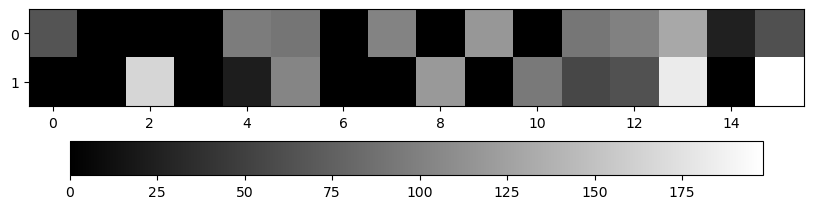


 [182  31 255 230 254 142 134  31 206 230]


In [8]:
plt.figure(figsize = (10,3))
plt.imshow(model.last_intermediate_outputs, cmap="grey")
plt.colorbar(orientation="horizontal")
print("\n", model.last_intermediate_outputs[0])
plt.show()
print("\n", model.last_outputs)